# Examen Extraordinario de Simulación II

## 1.Integración Monte Carlo

**a) Aproxime el valor de $$ \int_{0}^{1} \frac{e^{x}-1}{e-1} dx $$ usando el método MC de la Media muestral.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
#definimos la función
def funcion(x):
    return (np.exp(x)-1.0)/(np.exp(1.0)-1.0)

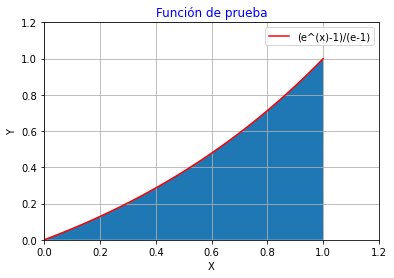

In [16]:
#graficamos la función de prueba 
X = np.linspace(0,1,1000)
plt.plot(X, funcion(X), color='red', label="(e^(x)-1)/(e-1)")
plt.fill_between(X, funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Estimamos el valor por el método de la media muestral.

In [17]:
def mc_crudo(funcion, n):
    integral = []
    suma = []
    for i in range(n):
        u = np.random.random_sample()
        y=(funcion(u)+funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))

    print("El valor de la integral con variables antitéticas es: ", round(np.mean(suma),5))
    print("El error estandar es: ", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [18]:
def mc_crudo1(funcion, n):
    integral = []
    suma = []
    for i in range(n):
        u = np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))

    print("El valor de la integral es: ", round(np.mean(suma),5))
    print("El error estandar es: ", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

El valor de la integral es:  0.40975
El error estandar es:  0.00916
El valor de la integral con variables antitéticas es:  0.41818
El error estandar es:  0.00115


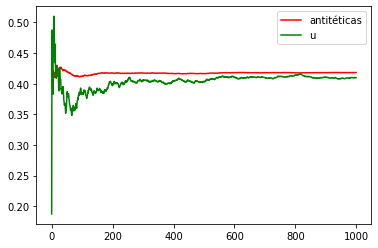

In [19]:
X1=mc_crudo1(funcion,n=1000)[2]
X=mc_crudo(funcion,n=1000)[2]

plt.plot(X, color='red', label='antitéticas')
plt.plot(X1, color='green', label='u')
plt.legend()

Observamos que por media de las variables antitéticas el valor converge de manera más rápida al valor real de la integral. Y que la varianza se redujo en un 88%.

## 2.Lineas de espera.Rresuelva por simuacion el siguiente problema 

A un autolavado los autos llegan siguiendo una distribución de Poisson, con 4 autos por hora, que pueden esperar en el estacionamiento de la instalación, si el lugar de lavado está ocupado. El tiempo para lavar y limpiar un automovil es exponencial, con 10 minutos de promedio. Los automóviles que no se pueden estacionar en la instalación pueden esperar junto a lavado. Eso quiere decir que pata todo fin práctico no hay límite del tamaño del sistema. ¿Qué capacidad debería tener el estacionamiento? 

In [2]:
from random import expovariate, random
from statistics import mean 
from math import inf as Infinity
from math import log, exp

In [5]:
# Parametros

lamda = 4.0                         # Razón de arrivos (1/Lambda)  Ojo
mu = 6.0                            # Razón de salida (1/Mu)       Ojo


Num_carros = 100000         # Numero de carros a simular

count = 0                           # Contador de carros simulados
t = 0
N = 0                               # Variable de estado: numero de carros en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

t_evento_anterior = 0.0             # tiempo del último evento ****************Nuevas líneas de código***********


# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales
Area = []                           # Area de escalón ***********************************************************


while count < Num_carros:
#while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        
        # Area del escalón ***********************************************************************************
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts
        ts_Data.append(t)
        
        # Area del escalón ***********************************************************************************
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:

for i in range(Num_carros):
#for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)

print( "Retraso promedio = W = ", round( mean(r_Data), 4) )
print( "E[ N(t)] = L = ", round(sum(Area)/t, 4))

Retraso promedio = W =  0.4916
E[ N(t)] = L =  1.9694


Por tanto, la capacidad del estacionamiento debería ser de 2 cajones de acuerdo a la simulación. 

## 3. Simulación Montecarlo de Precios.

**a) Descargue los datos históricos de Facebook(1 de julio de 2021 al 31 de abril de 2022) de Yahoo Finanzas, guárdelos en un DataFrame de Pandas e imprima el encabezado, grafique los rendimientos y determine el rendimiento promedio**


In [45]:
## importamos las librerias correspondientes
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternativa
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [47]:
import numpy as np
import pandas as pd
import yfinance as yf  ## usamos yahoo finance para obtener los datos 

In [48]:
RISKY_ASSET = 'META'
START_DATE = '2021-07-01'
END_DATE = '2022-04-30'

Cremos el Dataframe con los datos de facebook

In [49]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)
print(f'Descargados {df.shape[0]} renglones de datos.')

[*********************100%***********************]  1 of 1 completed
Descargados 210 renglones de datos.


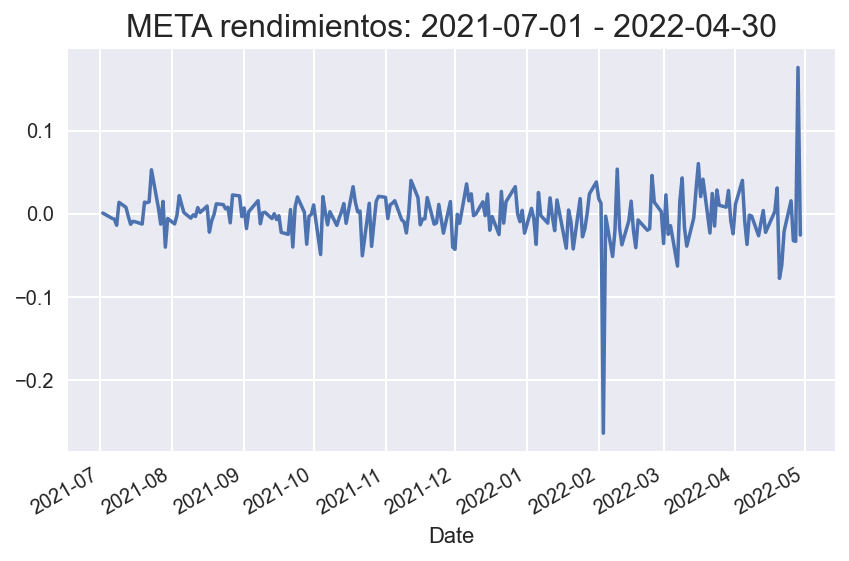

Rendimiento promedio: -0.22%


In [50]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()   # quitamos los valores nulos del data 

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} rendimientos: {START_DATE} - {END_DATE}', 
             fontsize=16)


plt.tight_layout()
#plt.savefig('imagen1.png')
plt.show()

print(f'Rendimiento promedio: {100 * returns.mean():.2f}%')

**b) Realice las pruebas para determinar si los rendimientos siguen un movimiento browniano: histograma, gráfica cuantil-cuantil, test de kolmogorov.**

Graficamos el histograma para ver si los rendimientos siguen una distribución normal o no.

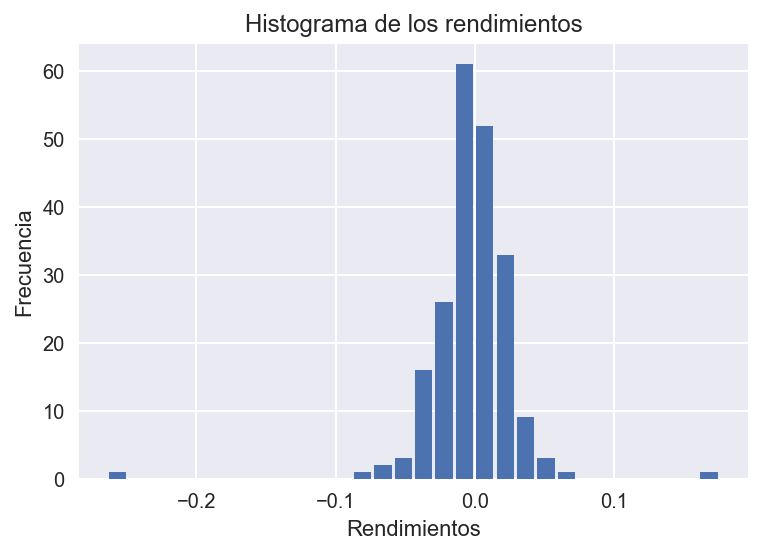

In [51]:
plt.hist(x=returns, rwidth=0.85, bins=30)
plt.title('Histograma de los rendimientos')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')

plt.show()

Al parecer los rendimientos si siguen una distribución normal o se asemeja a una. Ahora dividimos el conjunto de datos en dos: un conjunto de entrenamiento y uno de prueba.

In [52]:
train = returns['2021-07-01':'2021-11-30']
test = returns['2021-12-01':'2022-04-30']

Definimos los parametros de simulación.

In [53]:
T = len(test)   # longitud del periodo de predicción
N = len(test)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu = train.mean()    
sigma = train.std()

In [54]:
mu, sigma

(-0.0006878830239264367, 0.01747700345840843)

In [55]:
from scipy import stats

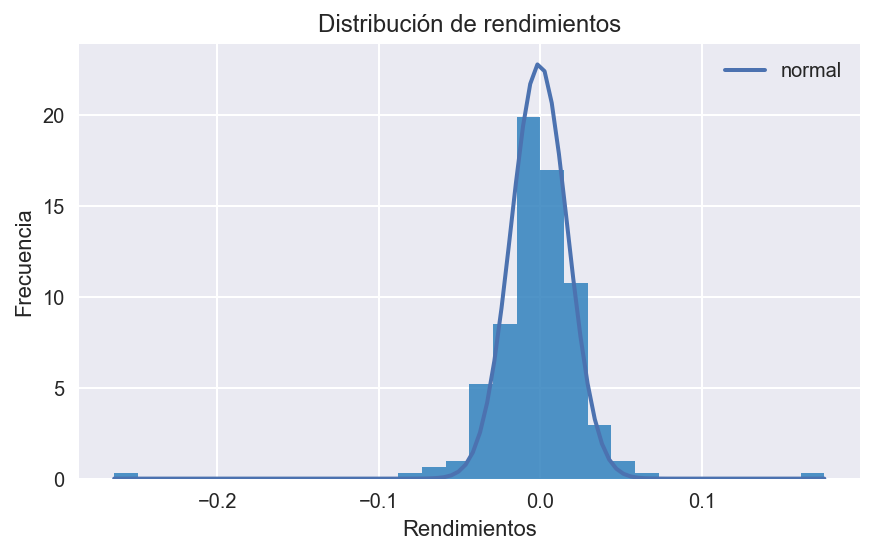

In [56]:
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

Utilizando una gráfica cuantil-cuantil.

In [57]:
import pylab 

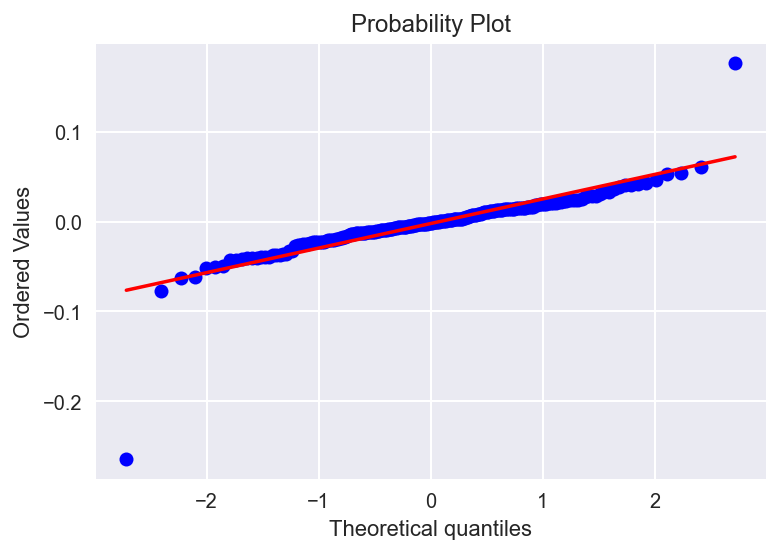

In [58]:
stats.probplot(returns, dist="norm", plot=pylab)
pylab.show()

En el test de kolmogorov tenemos que:

In [59]:
from scipy.stats import kstest

In [60]:
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.07799758938000649, pvalue=0.14911867753690022)

De acuerdo al p-value del test de kolmogorov nos dice que si se sigue una distribución normal

**c) divida el conjunto de datos en un 70% para entrenamiento y 30% de prueba. Del conjuntode entrenamiento determine mu
y sigma, y úselos para predecir el precio en el conjunto de prueba.**

In [78]:
train2 = returns['2021-07-01':'2022-01-31']
test2 = returns['2022-02-01':'2022-04-30']

In [79]:
T = len(test2)   # longitud del periodo de predicción
N = len(test2)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train2.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu2 = train2.mean()    
sigma2 = train2.std()

mu2, sigma2

(-0.0006653296584124623, 0.01864835999815482)

In [80]:
import pylab 

In [81]:
from scipy.stats import kstest

kstest(returns, 'norm', args=(mu2, sigma2))

KstestResult(statistic=0.07044356912574129, pvalue=0.2393408440804815)

In [82]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [83]:
gbm_simulations = simulate_gbm(S_0, mu2, sigma2, N_SIM, T, N)

print(gbm_simulations)

[[313.26000977 310.91737043 311.51773957 ... 371.51843686 358.26680745
  353.9275393 ]
 [313.26000977 310.2723514  314.44396448 ... 291.91252964 279.33218561
  274.34553288]
 [313.26000977 318.33516076 319.65312213 ... 317.22263073 328.5858291
  318.29014542]
 ...
 [313.26000977 312.64889909 324.09775071 ... 311.1082704  308.72463625
  309.17958364]
 [313.26000977 305.03008428 305.79868573 ... 383.38526467 370.56577395
  371.94532445]
 [313.26000977 325.94709178 333.52129664 ... 329.8439938  327.51472221
  329.84085469]]


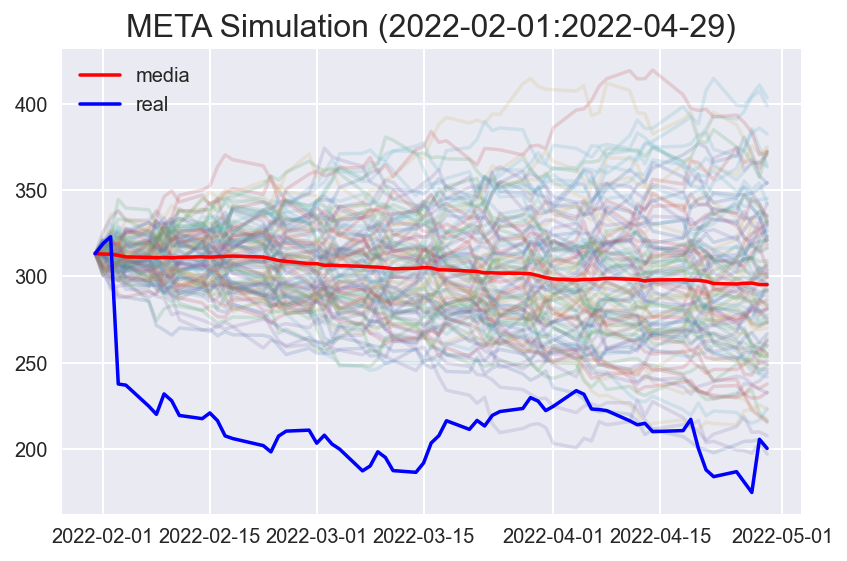

In [84]:
last_train_date = train2.index[-1].date()
first_test_date = test2.index[0].date()
last_test_date = test2.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

**d)Repita el procedimiento para una partición de entrenamiento-prueba del 80-20%**

In [85]:
train3 = returns['2021-07-01':'2022-02-28']
test3 = returns['2022-03-01':'2022-04-30']

In [86]:
T = len(test3)   # longitud del periodo de predicción
N = len(test3)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train3.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu3 = train3.mean()    
sigma3 = train3.std()

mu3, sigma3

(-0.002671842222266897, 0.02838157258383417)

In [88]:
import pylab 

from scipy.stats import kstest

kstest(returns, 'norm', args=(mu3, sigma3))


KstestResult(statistic=0.10647679323696316, pvalue=0.016179866216281084)

In [90]:
gbm_simulations = simulate_gbm(S_0, mu3, sigma3, N_SIM, T, N)

print(gbm_simulations)

[[211.02999878 208.2582166  208.49547116 ... 234.02383329 224.42827055
  223.61733292]
 [211.02999878 223.05346125 228.55118639 ... 182.9424296  180.74914522
  178.77472737]
 [211.02999878 215.40300097 213.59382755 ... 173.17899451 168.70551651
  175.15020584]
 ...
 [211.02999878 216.5107528  212.86366342 ... 229.58051834 226.87731798
  220.50510145]
 [211.02999878 203.09047055 215.68721954 ... 165.70179266 164.75387357
  170.37856816]
 [211.02999878 212.12471157 209.25780953 ... 120.38161204 121.70295518
  120.70803052]]


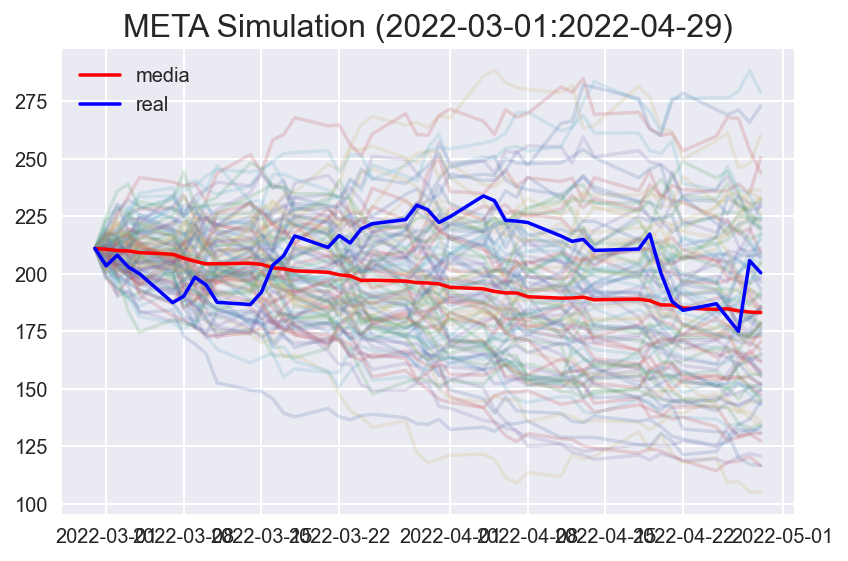

In [91]:
last_train_date = train3.index[-1].date()
first_test_date = test3.index[0].date()
last_test_date = test3.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

**e) Repita para una partición 90-10% y elabore algunas conclusiones a partir de las gráficas**

In [93]:
train4 = returns['2021-07-01':'2022-03-31']
test4 = returns['2022-04-01':'2022-04-30']

T = len(test4)   # longitud del periodo de predicción
N = len(test4)   # número de incrementos unitarios en el periodo de predicción
S_0 = adj_close[train4.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu4 = train4.mean()    
sigma4 = train4.std()

mu4, sigma4

(-0.0020147872513533852, 0.02864155236849239)

In [94]:
import pylab 

from scipy.stats import kstest

kstest(returns, 'norm', args=(mu3, sigma3))


KstestResult(statistic=0.10647679323696316, pvalue=0.016179866216281084)

In [95]:
gbm_simulations = simulate_gbm(S_0, mu4, sigma4, N_SIM, T, N)

print(gbm_simulations)

[[222.36000061 219.56159882 219.96306498 ... 238.87519828 240.27720645
  250.79380372]
 [222.36000061 224.7630677  221.10328786 ... 222.84724364 222.36497823
  216.96013337]
 [222.36000061 230.60549807 221.2151896  ... 244.21848152 254.91444136
  245.26831059]
 ...
 [222.36000061 215.05658995 200.50150706 ... 208.09220664 188.10421288
  186.98847268]
 [222.36000061 232.3711711  244.92321254 ... 199.60551025 190.4532501
  202.15534647]
 [222.36000061 222.63340471 231.93925058 ... 227.19694748 239.22091667
  233.68953872]]


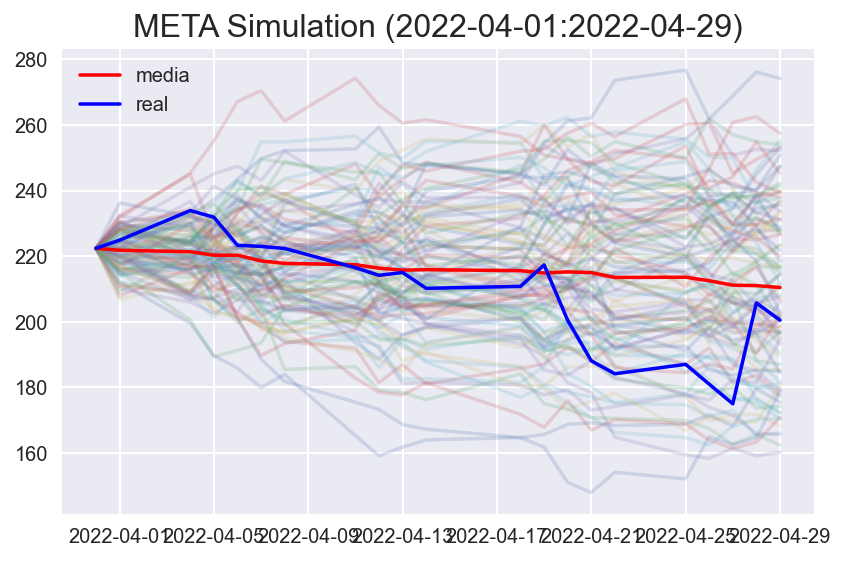

In [96]:
last_train_date = train4.index[-1].date()
first_test_date = test4.index[0].date()
last_test_date = test4.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

Observamos que entre mas grande sea nuestra muestra de entrenamiento el valor parece aproximarse un poco más al valor real
por lo que podríamos decir que si se sigue una distribución normal, ya que no hay mucha variación en los rendimientos como 
se mostró en la figura META rendimientos.